# Overview

There are many data visualization libraries and tools available for Python. Complete treatment of data visualization, from theory to practice, is a course unto itself.

However, we need to use basic visualization to understand data that we use in this course. In Python, the matplotlib library is a common or *defacto* visualization library; this library is based on the syntax and concepts of the plotting functions in the commercial Matlab software package. There are complete [tutorials](https://matplotlib.org/users/pyplot_tutorial.html) and [sample galaries](https://matplotlib.org/gallery.html) that show how complex visual displays can be created.

We'll see that using Pandas makes some of these tasks easier, and we'll cover that after getting the basic idea of matplotlib. It's still worth understanding matplotlib because you will encounter it often.

We'll cover some basics:
* Descriptive statistics of a univariate (single variable) data
* Descriptive statistics of multivariate (two or more variables) data

As with most things, matplotlib is not built into Python and we need to import it. The line ```%matplotlib inline``` provides direction to have the plots be inserted into the notebook (you can also plot to files, printers).

Lastly, we will also use the ```scipy``` package -- this is a [scientific computing package](https://docs.scipy.org/doc/scipy/reference/) that is common paired with NumPy and Pandas. It provides a number of statistical methods that are not directly included in NumPy.

In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
import scipy.stats.kde

We'll use the titantic data in some places

In [4]:
ti = pd.read_csv('https://raw.githubusercontent.com/jorisvandenbossche/pandas-tutorial/master/data/titanic.csv')

URLError: <urlopen error unknown url type: https>

## Getting Some Single Factor Data

Data of a single factor, such as ticket prices or the age of passenger, can best be presented using a boxplot or histogram.

We're going to extract the ages from the Titantic data and skip the NaN entries since those can't easily be plotted by matplotlib. 

We're also going to drop the indicies used in Pandas and just manipulate the values.

This effectively removes the data from the world of Pandas and puts it into the world of NumPy.

We'll also pull out the sage of men and women separately to show how to display multiple univariate data side-by-side

In [7]:
age = ti.Age.dropna().values
print('The first 5 of', age.size, 'ages are', age[:5])

ageMen = ti.Age[ ti.Sex=='male'].dropna().values
ageWomen = ti.Age[ ti.Sex!='male'].dropna().values

The first 5 of 714 ages are [ 22.  38.  26.  35.  35.]


Let's first understand our data using a standard numeric description of the data.

A standard set of descriptive statistics includes the mean, standard deviation and some measure of disperson -- either the Inter-Quartile Range or the quartiles of the data.

In [8]:
ti.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

There is no simple corresponding display in NumPy and even in SciPy's stats function the results are useful but not easy to read.

In [9]:
scipy.stats.describe(age)

DescribeResult(nobs=714, minmax=(0.41999999999999998, 80.0), mean=29.69911764705882, variance=211.01912474630805, skewness=0.3882898514698657, kurtosis=0.16863657224286044)

## Simple Boxplot

At it's most basic, matplotlib can produce a workable boxplot in a single line. This calls the boxplot function to display a boxplot of the age data.

The semi-colon at the end of the line suppresses unneeded output -- try removing it and re-evalating the expression to see what happens.

The boxplot is in a standard form -- outlier data is removed and shown as bubbles. The min and max of the remaining data is shown with the "error bar" pattern. The inner box spans the inter-quartile range (i.e. from 25-75% of the values) and the middle line is the median. The mean is not shown.

<IPython.core.display.Javascript object>


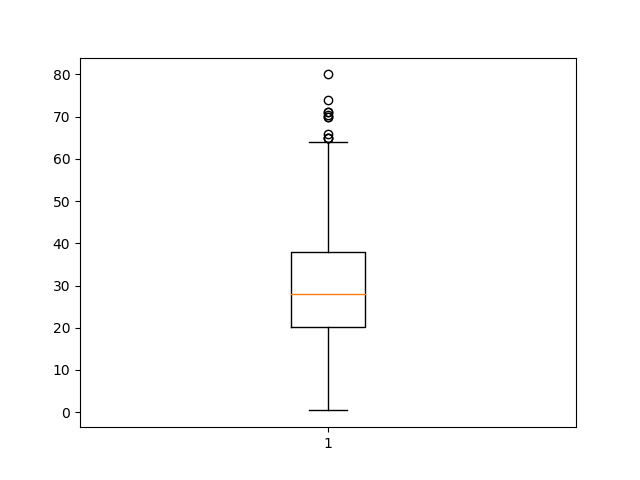

In [12]:
plt.boxplot(age);

## Adding Labels and Axes

The fully description of the matplotlib.pyplot library is [long](https://matplotlib.org/api/pyplot_summary.html), but it's simple to make our simple box plot more useful.

In the example below, we'll show two side-by-side boxplots for the age of men and women and draw a horizontial line indicating the mean age for the women.

This example uses the [pyplot](https://matplotlib.org/api/pyplot_summary.html) interface. Each directive has a lot of options - for example, the [```plt.boxplot()``` method](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot) has lots of options to specify the shape and color of the boxplot.

To be honest, you'll never figure out how to use all of this by Reading The Fine Manual -- you should go to the [gallary of example plots](https://matplotlib.org/gallery/index.html#pyplots-examples), find one that looks like what you want and then modify that example to your needs.

For example, once we find a [sample boxplot](https://matplotlib.org/gallery/pyplots/boxplot_demo.html#sphx-glr-gallery-pyplots-boxplot-demo-py) we can then read through [all the options in the boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot) to find out how to add meaningful labels.

<IPython.core.display.Javascript object>


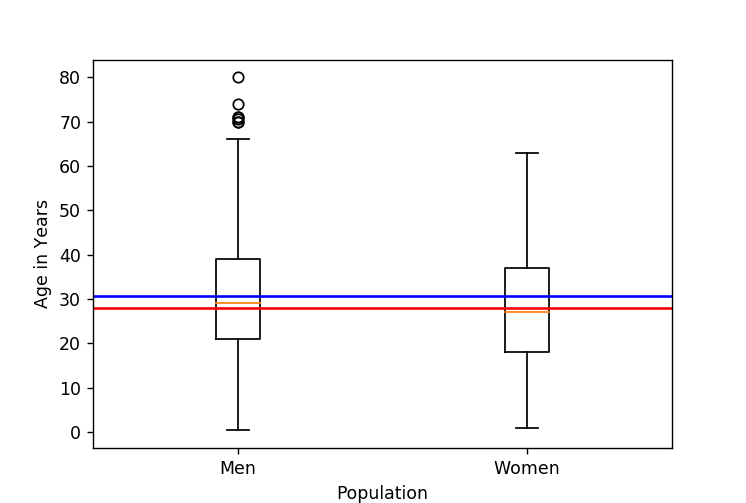

In [14]:
fig,ax = plt.subplots()
plt.boxplot([ageMen, ageWomen], labels=['Men', 'Women'])
plt.ylabel('Age in Years')
plt.xlabel('Population')
plt.axhline(np.mean(ageWomen),color='red')
plt.axhline(np.mean(ageMen),color='blue')

plt.show()

## Finer Control & Multiple Plots

Each of the commands we used (boxplot, axhline) implicitly refer to the "current plot".

Now, let's look at how we can combine multiple plots into a single figure; that will requires a similar, but different set of commands focused on "figures" and "axes" (a specific plot). Pyplot actually uses these for the simple plot we did above. Now, we'll have more control.

Basically, everything we did to "the plot" above, we now do to an "axes". We make little use of the "figure" -- [it's mainly used to add or modify subplots](https://matplotlib.org/xkcd/api/figure_api.html).

When using the fig/axes method, there are some subtle (and irritating) differences in how to get something done. For example, it's slightly more complicated to set the X axes tick labels.

Matplotlib has [several "style sheets"](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html) that style the plot output.

In [43]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True)

#plt.style.use('fivethirtyeight')
plt.xkde

axes[0].violinplot([ageMen, ageWomen])
axes[0].set_title('Violin plot')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Observed values')
axes[0].axhline(np.mean(ageMen))

axes[1].boxplot([ageMen, ageWomen])
axes[1].set_title('Box plot')
axes[1].set_xlabel('Same Data!')
axes[1].axhline(np.mean(ageWomen))

# Set labels on both axes
plt.setp(axes, xticks=[1,2], xticklabels=['men', 'women']);

plt.show()
plt.style.use('default')

<IPython.core.display.Javascript object>

AttributeError: module 'matplotlib.pyplot' has no attribute 'xkde'

## Gallary of Univariate Plots

Rather than go through individual plots for univariate data, we'll point you to references showing you how to construct plots from Section 1.6 of the Open Intro reading and chapter 16 of MIPS.

### Strip or Plots

A strip-plot or dot-plot shows the individual data points scatter along a verticle axis. There is no simple way to do this using matplotlib in a single akin to the boxplot or violin plot. There is a way using the [Seaborn library](https://seaborn.pydata.org/generated/seaborn.stripplot.html), which is similar to the more standard matplotlib library but which produces nicer plots.

I've provided one solution below. The Titantic data isn't a great source because much of the age data is clustered around ages 20-40. In the following, we're plotting data using (x,y) pairs. 

The y data is the age of the men or women.

The x data could be a vector of all 0's (for the men) or 1's (for the women) -- this would produce a single many dots layered on top of one another. In order to separate the dots, we "jitter" the x dimension by adding in samples from a Normal distribution centered around zero. This uses the ```np.random.normal``` NumPy command we haven't discussed yet.

<IPython.core.display.Javascript object>


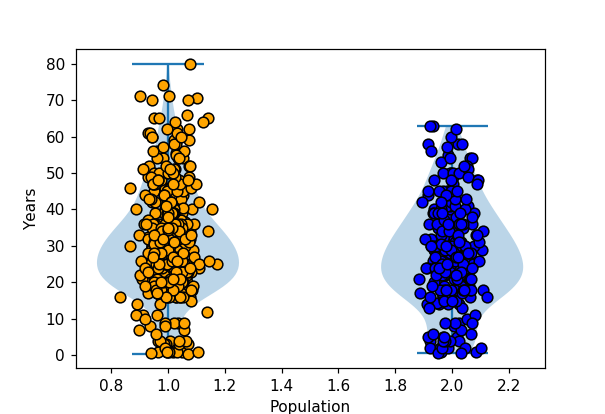

In [26]:
fig,ax = plt.subplots()
plt.ylabel('Years')
plt.xlabel('Population')
plt.violinplot([ageMen, ageWomen])

x = np.ones(len(ageMen))*1.0+np.random.normal(0,0.05,len(ageMen))

plt.plot(x, ageMen, linestyle='None', marker='o', color='orange', mec='k', ms=7)

x = np.ones(len(ageWomen))*2.0+np.random.normal(0,0.05,len(ageWomen))
plt.plot(x, ageWomen, linestyle='None', marker='o', color='blue', mec='k', ms=7)

plt.show()

### Histograms

As discussed in OpenIntro 1.6.3 and MIPS 17, histograms can show the distribution of univariate data but selecting the appropriate binsize. You can [either set the number of bins (as done for the men), select an automatic number of bins or set the bins explicitly](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html).

This [StackOverflow article shows how](https://stackoverflow.com/questions/6986986/bin-size-in-matplotlib-histogram) to explicit set the bin boundaries.

<IPython.core.display.Javascript object>


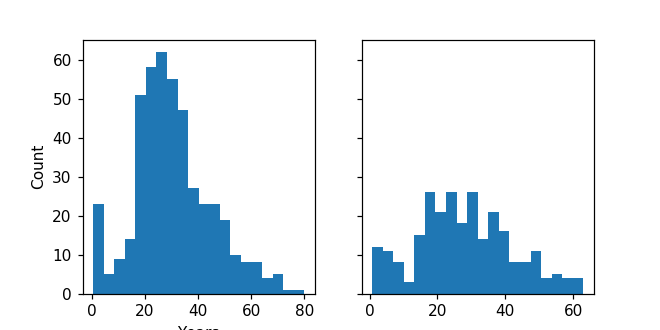

In [31]:
fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True, figsize=(6,3))
ax[0].hist(ageMen, bins=20)
ax[0].set_ylabel('Count');
ax[0].set_xlabel('Years')
ax[1].hist(ageWomen, bins=20);

### Kernel Density Estimates

A Kernel Density Estimate plot is generated by combining a shape spanning a "bandwidth" and our univariate data. The smooth density plot that results shows the general shape of the data.

Again, [the Seaborn graphics library does this easily](https://seaborn.pydata.org/tutorial/distributions.html), but it can be done in Matplotlib as below. This uses code from the SciPy library to compute the KDE distribution.

Later in the class, we'll go through how the KDE density is generated and what effect the "bandwidth" can have.

<IPython.core.display.Javascript object>


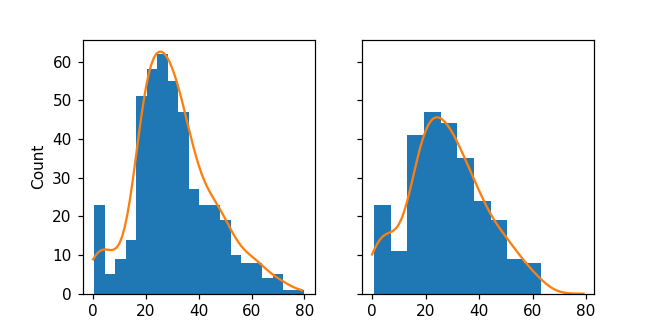

In [33]:
fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True, figsize=(6,3))

ax[0].hist(ageMen, bins=20)
density = scipy.stats.kde.gaussian_kde(ageMen)
x = np.arange(0,80)
ax[0].plot(x, density(x)*2000)
ax[0].set_ylabel('Count');

ax[1].hist(ageWomen)
density = scipy.stats.kde.gaussian_kde(ageWomen)
x = np.arange(0,80)
ax[1].plot(x, density(x)*1600);

## Multivariate Data: Scatter Plots

We're only going to look at *scatterplots*. We'll do a comparison of the fare *vs* the age for men and women.

### Preparing some multivariate Data

Our first challenge is preparing matching multivariate data for the men. The challenge is that when we selected the ages of men, we didn't use the full set of men because the age for some was unknown -- we had used ```dropna``` to eliminate those unknown samples.

We need to find the fare for the same set of men and women that we used.

We'll do this by selecting the same set of men, dropping the ones that are NaN but then extracting the *index* of the resulting data rather than the *value*. We can then use the index to extract the matching fares.


In [36]:
indexMen = ti.Age[ti.Sex=='male'].dropna().index
indexWomen = ti.Age[ti.Sex!='male'].dropna().index

fareMen = ti.Fare[ indexMen ]
fareWomen = ti.Fare[ indexWomen ]

### The Scatterplot

<IPython.core.display.Javascript object>


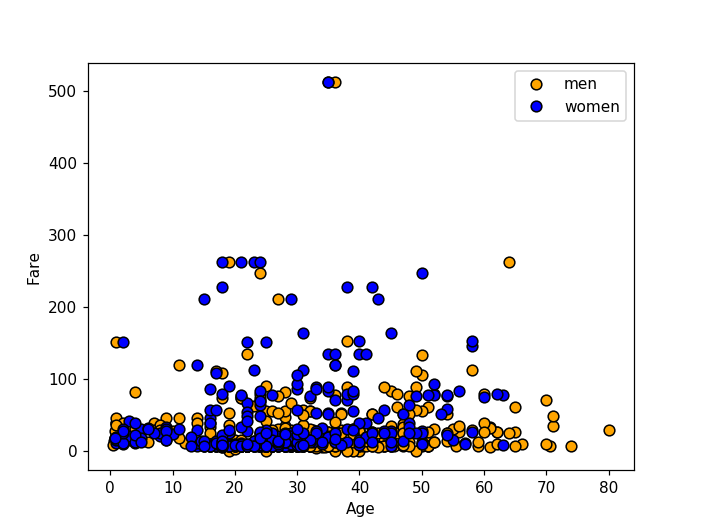

In [40]:
plt.plot(ageMen, fareMen,  label='men', linestyle='None', marker='o', color='orange', mec='k', ms=7)
plt.plot(ageWomen, fareWomen, label='women', linestyle='None', marker='o', color='blue', mec='k', ms=7)
plt.ylabel('Fare')
plt.xlabel('Age')
plt.legend(loc='upper right');